## Setup

In [97]:
import numpy as np
import pandas as pd
import plotnine as pn

from collections import Counter

from sciterra.atlas import Atlas

In [98]:
bibtex_fp = "data/single_publication.bib"
single_path = "outputs/atlas_single"
double_path = "outputs/atlas_double"

In [99]:
atl_double_exp = Atlas.load(double_path)

In [100]:
len(atl_double_exp)

1999

## Exploratory data analysis

In [101]:
# can we get information by year?
years = dict()
papers_per_year = dict()
words = Counter()

def get_binary_occurences(abstract: str):
    """Return a Counter that counts up to 1 for each word."""
    counter = Counter(abstract.split())
    for k in counter:
        counter[k] = 1
    return counter

for id in atl_double_exp.publications:
    pub = atl_double_exp[id]
    # there should be functionality to pass to atlas to 'filter if None' that removes all publications / embeddings that have certain attributes None
    if pub.publication_date is not None:
        year = pub.publication_date.year
        if year not in years:
            years[year] = Counter()
            papers_per_year[year] = 0
        years[year] += get_binary_occurences(pub.abstract)
        papers_per_year[year] += 1


In [102]:
# sorted(papers_per_year)
papers_per_year

{2010: 56,
 2009: 56,
 2015: 49,
 2000: 24,
 2012: 64,
 2005: 39,
 2022: 40,
 1998: 19,
 2016: 62,
 2008: 50,
 2021: 60,
 2002: 29,
 2006: 38,
 2007: 43,
 1992: 14,
 2011: 55,
 1994: 22,
 2003: 28,
 1995: 15,
 2001: 28,
 2018: 58,
 1982: 4,
 1993: 12,
 2004: 37,
 1996: 13,
 1990: 9,
 2020: 48,
 1988: 11,
 2017: 42,
 2023: 12,
 1983: 6,
 1986: 10,
 1984: 8,
 2013: 63,
 1999: 17,
 1989: 10,
 1987: 12,
 1997: 28,
 1991: 8,
 2019: 45,
 2014: 65,
 1985: 6,
 1960: 2,
 1969: 1,
 1972: 1,
 1951: 3,
 1974: 1,
 1965: 2,
 1979: 3,
 1968: 3,
 1981: 1,
 1975: 2,
 1973: 2,
 1957: 1,
 1944: 1,
 1970: 3,
 1950: 3,
 1980: 1,
 1966: 1,
 1977: 1,
 1936: 1,
 1955: 1,
 1943: 1,
 1953: 1,
 1956: 1,
 1952: 1}

In [103]:
# divide the concept counts by the number of papers per year
for key in papers_per_year:
    counter = years[key]
    for word, freq in counter.items():
        counter[word] = freq / papers_per_year[key]

years

{2010: Counter({'of': 0.9642857142857143,
          'and': 0.9464285714285714,
          'the': 0.9464285714285714,
          'to': 0.8928571428571429,
          'in': 0.875,
          'a': 0.875,
          'that': 0.8035714285714286,
          'is': 0.7678571428571429,
          'on': 0.6785714285714286,
          'for': 0.6071428571428571,
          'are': 0.5714285714285714,
          'with': 0.5714285714285714,
          'this': 0.5535714285714286,
          'by': 0.5535714285714286,
          'be': 0.5357142857142857,
          'as': 0.5178571428571429,
          'from': 0.5178571428571429,
          'we': 0.5,
          'can': 0.48214285714285715,
          'In': 0.4642857142857143,
          'The': 0.4642857142857143,
          'We': 0.4642857142857143,
          'an': 0.44642857142857145,
          'which': 0.35714285714285715,
          'has': 0.35714285714285715,
          'This': 0.3392857142857143,
          'such': 0.3392857142857143,
          'also': 0.3392857142857143,


In [104]:
# now just remove years that don't have more than N papers?
years = {k:v for k,v in years.items() if papers_per_year[k] > 30}

sorted(years.keys())

[2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

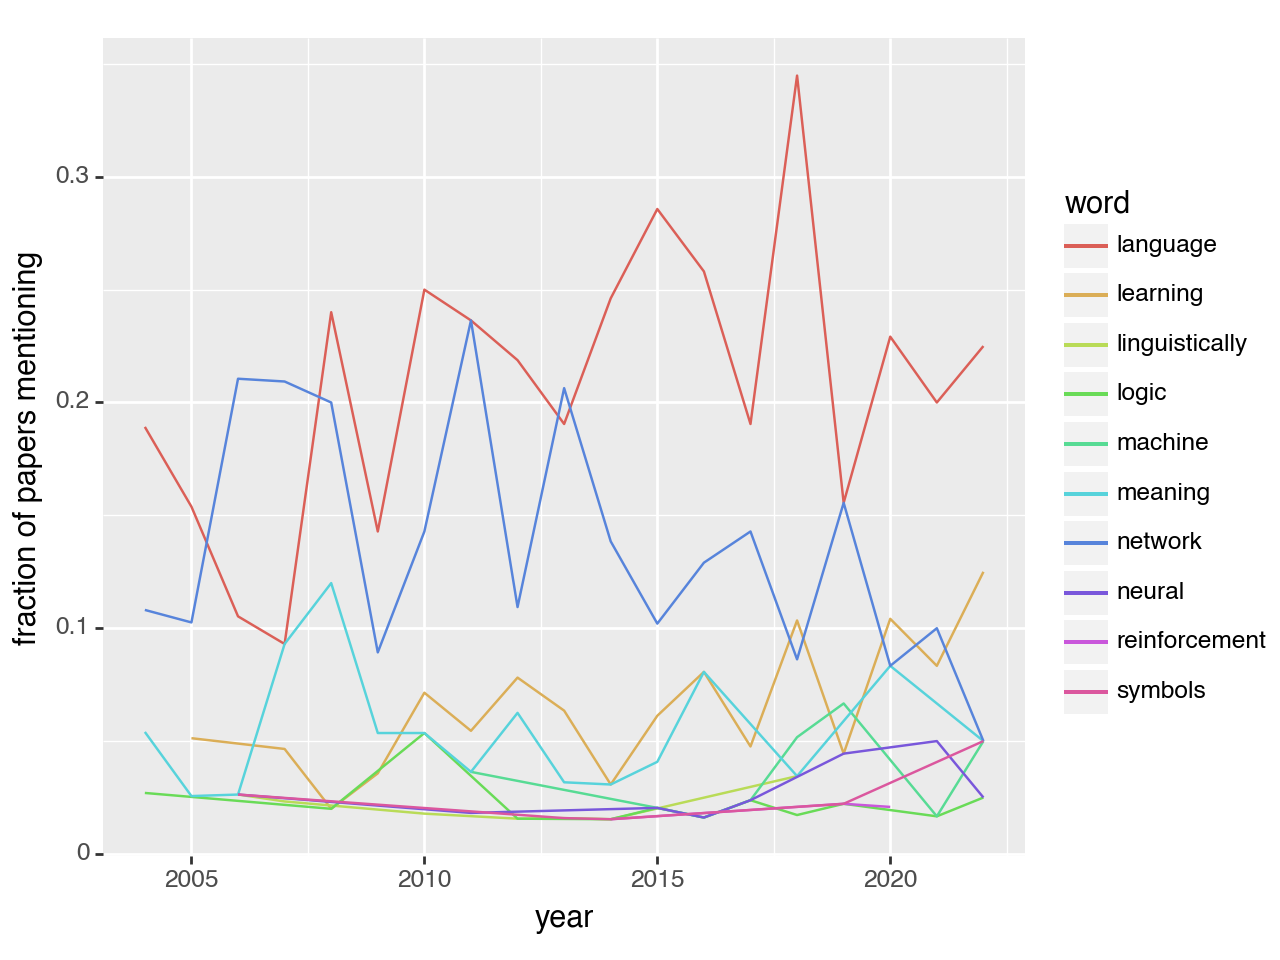

<Figure Size: (640 x 480)>

In [105]:
# write a function that can visualize the changing distribution over referents

dfs = []
for year, counter in sorted(years.items()):
    dfs.append(
        pd.DataFrame(
        [(k,v,year) for k,v in counter.items()],
        columns=["word", "fraction of papers mentioning", "year"]
        )
    )

data = pd.concat(dfs)

# lets just look at a few words for now
words = [
    "network",
    "machine",
    "symbols",
    "linguistically",
    "logic",
    "language",
    "neural",
    "reinforcement",
    "learning",
    "meaning",
    # "neutrino",
    # "exoplanet",
    # "dark",
]

data = data[data["word"].isin(words)]
data

(
    pn.ggplot(data, pn.aes(x="year", y="fraction of papers mentioning"))
    # + pn.geom_point(
    + pn.geom_line(
        mapping=pn.aes(
            color="word",
        )
    )
)